#  CREDIT EDA CASE STUDY:
  ###  Rajat (ashmitverma29@gmail.com)   

The aim is to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.







# 1. Importing data and libraries

In [1]:
#importing commonly used libraries for exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing loan application data as df
df = pd.read_csv('application_data.csv')
#importing previous credit application data as df1
old_df = pd.read_csv('previous_application.csv')

In [3]:
#inspecting the raw data in new application
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#inspecting the raw data in old application
old_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Checking the structure of the new applicant data
## 2.1 Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# fetching the number of rows and columns
rows = df.shape[0]
cols = df.shape[1]
  
# displaying the number of rows and columns
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 307511
Columns: 122


In [6]:
#Finding summary statistic using panda's describe() function

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
#fetching the null value count

print("The total no of null values recorded in the applicarion was %d \n\n\n" %df.isnull().sum().sum())

#finding the percentage of missing values per coloumn

missing_values = pd.DataFrame((df.isnull().sum())*100/df.shape[0])

#representing in decending order to see coloumns with most missing values

print('Coloumns wirh highest % of missing values \n')

missing_values=missing_values.sort_values(by=0, ascending=False).head(60)

missing_values

The total no of null values recorded in the applicarion was 9152465 



Coloumns wirh highest % of missing values 



,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


## 2.2 Plotting the missing values

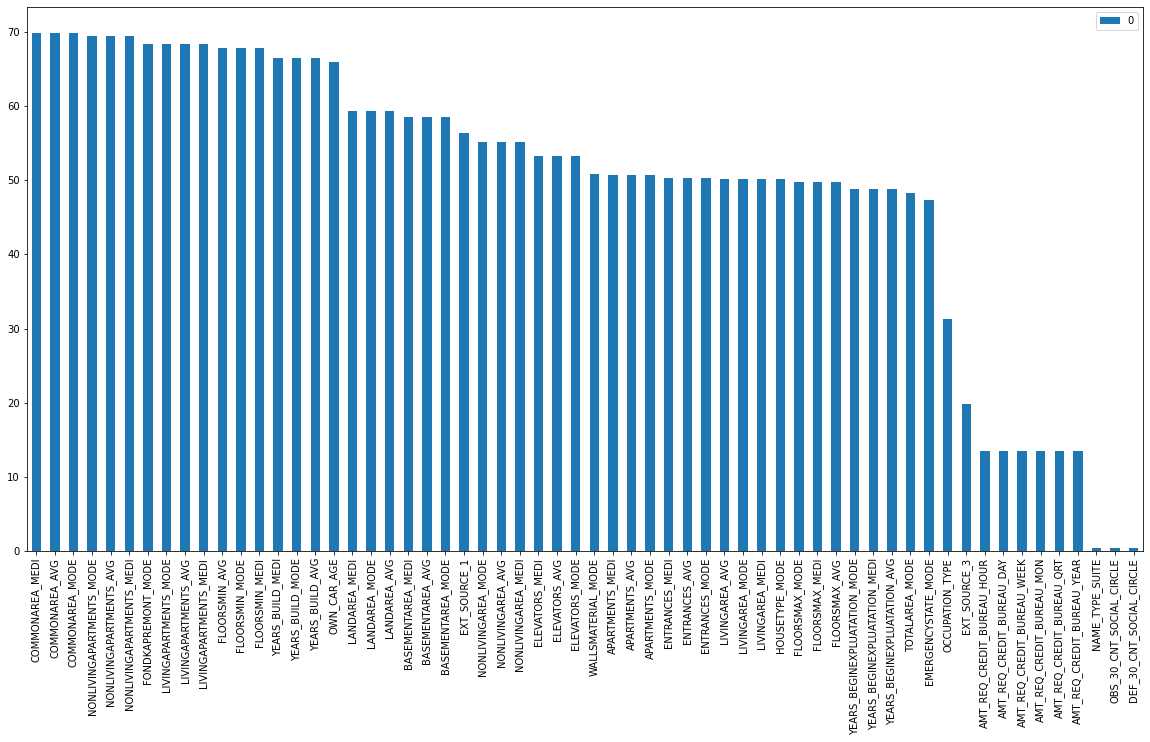

In [8]:
# reflecting our findings via bar graph
missing_values.plot(kind="bar", figsize=(20,10))
plt.show()

### Inferences-
 
#### 1. 49 coloumns have missing values ranging from 47.398 % to 69.87%
#### 2. After that null values steeply decrease and the data is more useful
#### 3. Since the data has 9152465 missing values, its wise to eliminate the 49 coloumns with maximum missing values
### 


# 3. Cleaning The New Data

## 3.1 Removing missing values

In [9]:
# SO THE COLOUMNS WITH LESS THAN 47% MISSING VALUES ARE

X=df.columns[df.isnull().mean() < 0.47]
print("SO THE COLOUMNS WITH LESS THAN 47% MISSING VALUES ARE", X)
#so we will be using these coloumns

SO THE COLOUMNS WITH LESS THAN 47% MISSING VALUES ARE Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_S

In [10]:
df=df[X]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#fetching the null value count

print("The total no of null values recorded in the applicarion was %d \n\n\n" %df.isnull().sum().sum())

#finding the percentage of missing values per coloumn

missing_values = pd.DataFrame((df.isnull().sum())*100/df.shape[0])

#representing in decending order to see coloumns with most missing values

print('The percentage of missing values are as follows \n')

missing_values.sort_values(by=0, ascending=False).head(10)



The total no of null values recorded in the applicarion was 412799 



The percentage of missing values are as follows 



,0
OCCUPATION_TYPE,31.345545
EXT_SOURCE_3,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,0.332021


### Inference : 

#### 1. So there are 73 coloumns left and the missing values range from 0 - 31.34%
#### 2. Occupation type is an outlier with more null values of 31%
#### 3. But it seems important so lets try to impute it
#### 

## 3.2 Trying to impute data for Occupation type


In [12]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
# Checking mode since its catagorical

df.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

### Inference: 
#### Seems like the value laibourers is best fit, 
#### but it dosent make sense to change a person's occupation to laibourer from a buisnes point of view
#### It changes the repayment ability and also insults the customer if he/she has better occupation
### 

## 3.3 Dealing with All the date coloums that start with Amt Req since they have 13.50% missing values-

In [14]:
print ("checking value counts \n", df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts().head())
# rechecking mode
print ("\nSo the mode  is\n", df.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
# checking mean
print ("\nSo the mean  is\n", df.AMT_REQ_CREDIT_BUREAU_YEAR.mean())


checking value counts 
 0.0    71801
1.0    63405
2.0    50192
3.0    33628
4.0    20714
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

So the mode  is
 0    0.0
dtype: float64

So the mean  is
 1.899974435321363


### Infrence

#### 1. It clearly dosnt make sense to reject a request becase the applicant is incapable of paying in a short amount of time 
#### 2. So altering this metric with mode or mean is going to reject reqests that were originally approvable for diffrent time frame
#### 3. Instead of negetivly letting values get impacted its better to leave the null value for these quantities
#### 3. 'AMT_REQ_CREDIT_BUREAU_YEAR''AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT'  are similar and no need such analysis
#### 4. Hence do not impute
### 

## 3.4 Dealing with XNA
#### 'XNA' means 'Not Available'. Let's find the number of rows and columns with this attribute

In [15]:
# In Gender and organisation
print('Gender:')
print(len(df[df['CODE_GENDER']=='XNA']))
print('Organization:')
print(len(df[df['ORGANIZATION_TYPE']=='XNA']))

Gender:
4
Organization:
55374


#### Inference: there are 55374 values in organisation and only 4 in gender

In [16]:
#checking the no of males and females in gender
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
# Since only 4 values. Let's change it to female as that won't affect data set 
df['CODE_GENDER']=df['CODE_GENDER'].apply(lambda x: 'F' if x== 'XNA' else x)

In [18]:
#checking the no of males and females in gender
df['CODE_GENDER'].value_counts()
#DONE

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## 3.5 Changing data types of necessary coloumns

In [19]:
# Making all values numerical 

numeric_columns=['TARGET','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','CNT_CHILDREN','AMT_INCOME_TOTAL','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.6 Converting to catagorical

In [20]:
#Separating income into zones
df['INCOME_GROUP']=pd.qcut(df['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1],labels=['Lowest','Low','Medium','High','Highest'])



In [21]:
#Creating a column AGE using DAYS_BIRTH
df['AGE']=abs(df['DAYS_BIRTH'])//365.25

In [22]:
#Creating a column AGE using DAYS_BIRTH
df['AGE']=abs(df['DAYS_BIRTH'])//365.25

In [23]:
df['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [24]:
# Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
df['AGE_GROUP'] = pd.cut(df['AGE'],bins=np.arange(20,71,5))

In [25]:
abs(df['DAYS_BIRTH']).quantile([0,0.2,0.3,0.6,0.8,1])

0.0     7489.0
0.2    11694.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [26]:
#Creating a column AGE using DAYS_BIRTH
df['AGE']=abs(df['DAYS_BIRTH'])//365.25

In [27]:
df['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [28]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
df['AGE_GROUP'] = pd.cut(df['AGE'],bins=np.arange(20,71,5))

# 4. Analysing Data

# UNIVARIATE ANALYSIS

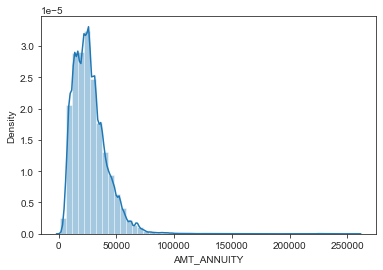

In [29]:
sns.set_style('ticks') 
sns.distplot(df['AMT_ANNUITY']) 
plt.show()

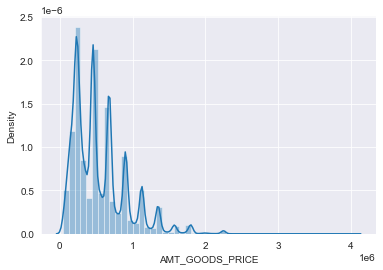

In [30]:
sns.set_style('darkgrid') 
sns.distplot(df['AMT_GOODS_PRICE']) 
plt.show()

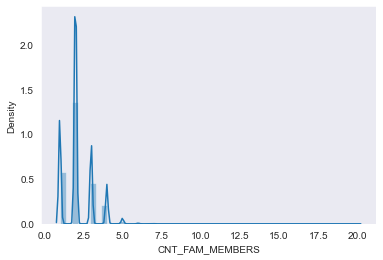

In [31]:
sns.set_style('dark') 
sns.distplot(df['CNT_FAM_MEMBERS']) 
plt.show()

#### EXT_SOURCE_2 is a continuous variable. So it may impute the values with mean

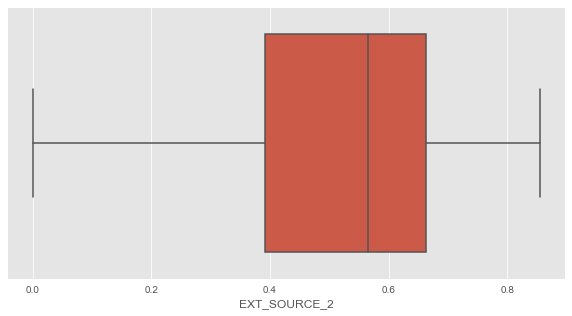

It may be imputed with


0.5143926741308463

In [32]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df['EXT_SOURCE_2'])
plt.show()
# no outliers found so mean is 
print ('It may be imputed with')
df['EXT_SOURCE_2'].mean()

#### *Converting the negative values to absolute values

In [33]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])


## 4.1 IMBALANCE PERCENTAGE

In [34]:
# target=1 i.e client with payment difficulties
# target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [35]:
# Calculating percentage Imbalance
print ('imbalance ratio is :')
round(len(target0_df)/len(target1_df),2)
## target 0 is majority

imbalance ratio is :


11.39

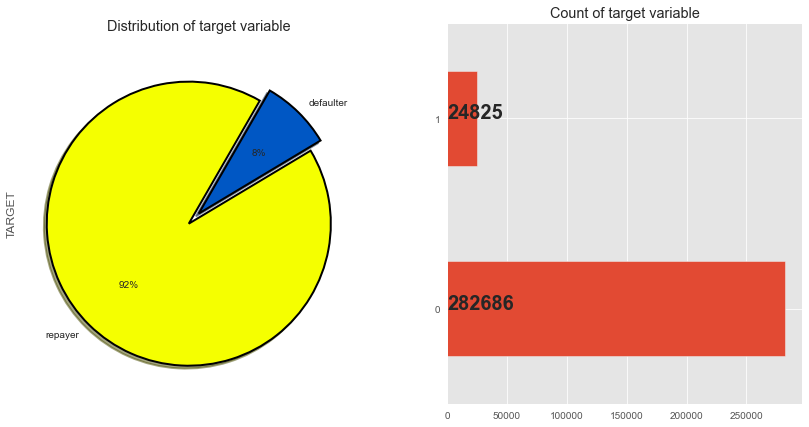

In [36]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

#### INFERENCE:- Number of people who default on their loans is around 9%.
## 

## 4.2 GENDER DISTRIBUTION

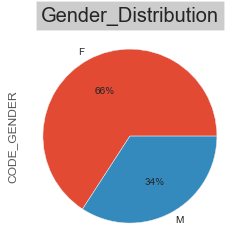

In [37]:
#checking the gender distribution
df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title("Gender_Distribution",fontsize=20,bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#### INFERENCE:- Number of females applying for loan is almost twice that of men.
## 

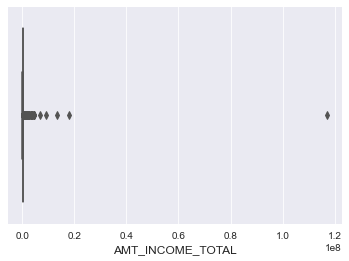

In [38]:
sns.set_style('darkgrid') 
sns.boxplot(df['AMT_INCOME_TOTAL']) 
plt.show()

#### INFERENCE: There is an extreme outlier in income
## 

## 4.3 Clients Income and Target

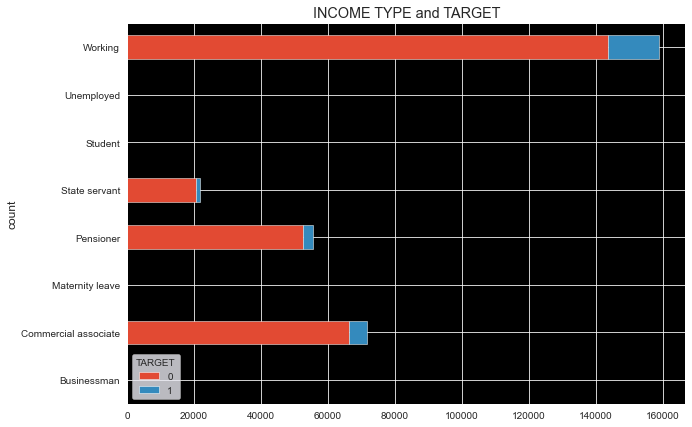

In [39]:
ax = pd.crosstab(df["NAME_INCOME_TYPE"],df["TARGET"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("INCOME TYPE and TARGET")
ax.set_facecolor("k")

#### INFERENCE:- The working class people are the one who defaults the most whereas state servants defaults the least.
## 

## 4.4 Equiries to Credit Bureau about the client before application.


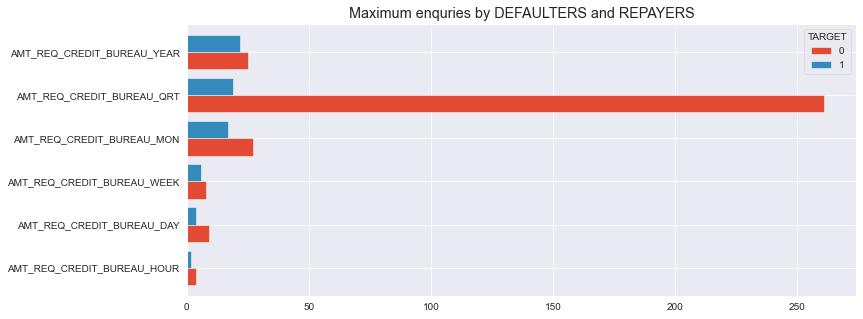

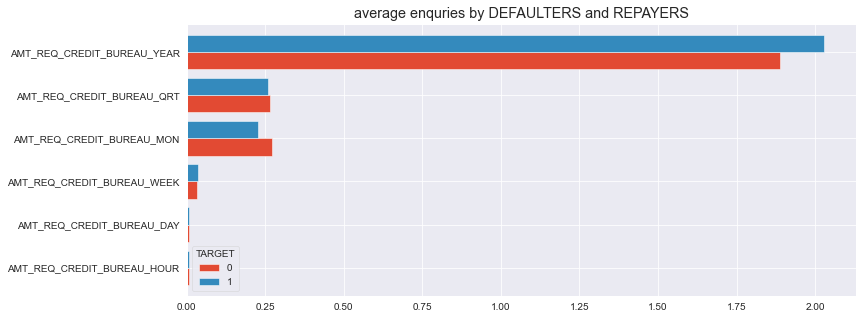

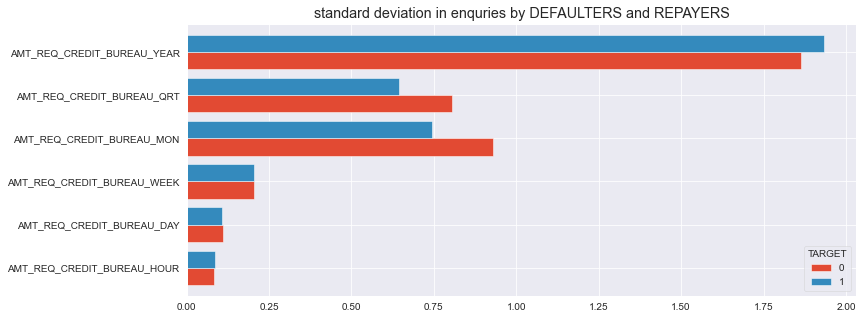

In [40]:
c = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df.groupby("TARGET")[c].max().transpose().plot(kind="barh",figsize=(12,5),width=.8)
plt.title("Maximum enquries by DEFAULTERS and REPAYERS")

df.groupby("TARGET")[c].mean().transpose().plot(kind="barh",figsize=(12,5),width=.8)
plt.title("average enquries by DEFAULTERS and REPAYERS")

df.groupby("TARGET")[c].std().transpose().plot(kind="barh",figsize=(12,5),width=.8)
plt.title("standard deviation in enquries by DEFAULTERS and REPAYERS")

plt.show()

#### INFERENCE:- 

#### 1- Maximum numbers of enquiries are done quarterly for repayers and for defaulters its done yearly.

#### 2- Average enquiries for repayer and deafulter clients are done yearly.
# 

## 4.5 AMOUNT CREDITED v/s TARGET based on GENDER

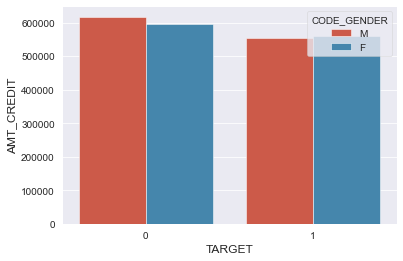

In [41]:
sns.barplot(x="TARGET",y="AMT_CREDIT",data=df,hue="CODE_GENDER",ci=None)
plt.show()

#### INFERENCE:- 
#### The credit amount for both male and female is almost very similar for both repayers and defaulters.
# 

## 4.6 Correlation between 

   ### AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

<AxesSubplot:>

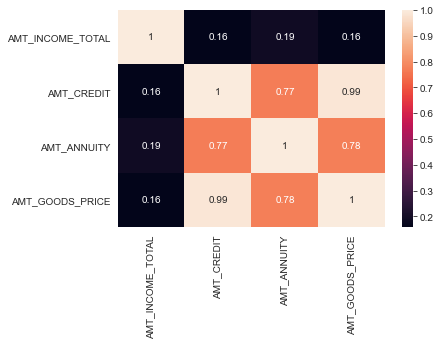

In [42]:
#making heatmap
sns.heatmap(df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(),annot=True)


#### INFERENCE:- 

#### 1- The correlation between Income of client, Amount credited and Income of client and goods price is the least i.e 0.16.
    
#### 2- Correlation between credit amount and goods price is the highest i.e 99% which makes sense.
# 

### 5 Concatenating application_data and previous_application


In [43]:
application_data_x = df[[x for x in df.columns if x not in ["TARGET"]]]
previous_application_x = old_df[[x for x in old_df.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0)

# 5 MULTIVARIATE ANALYSIS
## 5.1 Distribution in Contract types in application_data

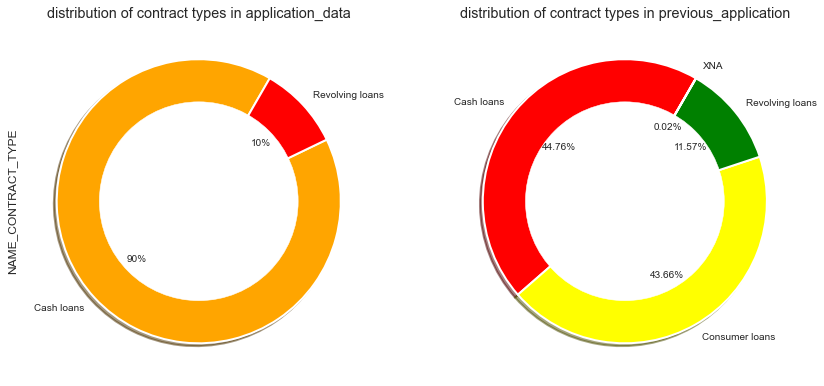

In [44]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

#### Inference
#### The percentage of revolving loans and cash loans are 10% & 90%.
# 

## 5.2 Distribution of Contract type by gender

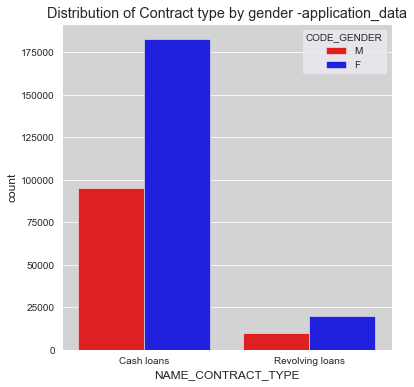

In [45]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "application_data"],palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

#### Inference
#### Cash loans is always prefered over Revolving loans by both genders.
# 

## 5.3 Distribution of client owning a car and by gender


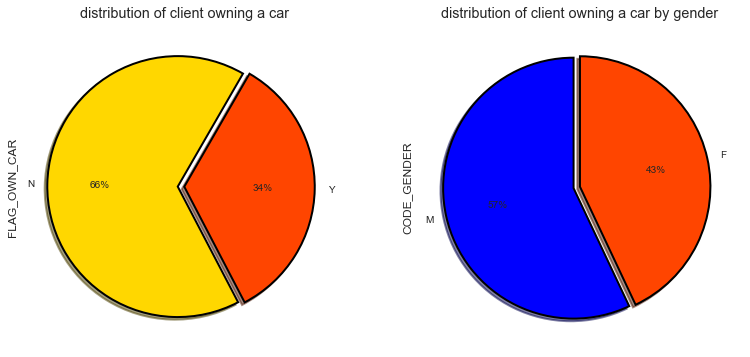

In [46]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

#### Inference
#### SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

#### SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.
# 

## 5.4 Distribution of client owning a house or flat and by gender


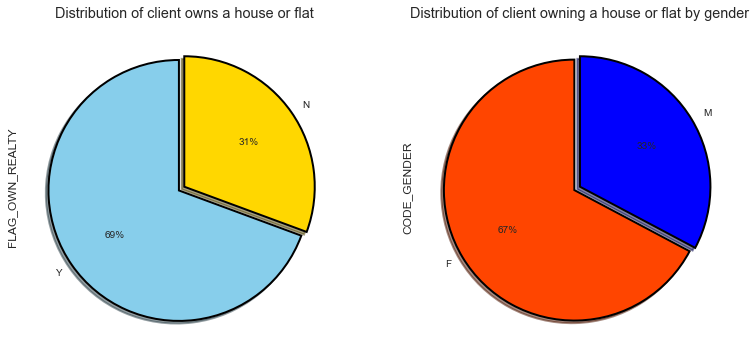

In [47]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

#### Infernece
#### SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

#### SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.
# 

## 5.5 Distribution of Number of children and family members of client by repayment status.


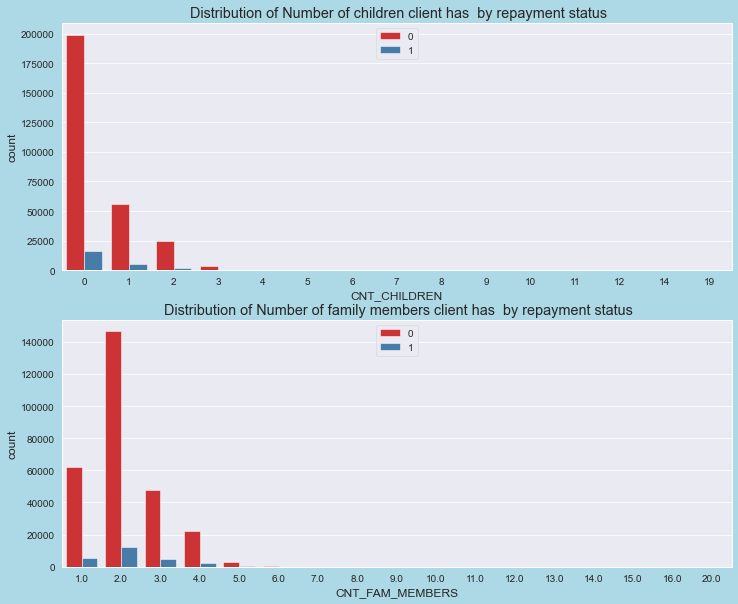

In [48]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(df["CNT_CHILDREN"],palette="Set1",hue=df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(df["CNT_FAM_MEMBERS"],palette="Set1",hue=df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

#### Inference
#### Subplot 1
#### 1. Clients having 1 child end up defaulting the most. On the other hand they have highest repayments.
#### 2. Clients with 3 childrens do not defualt

#### Subplot 2
#### 1. Client with a family of 2 membber make have frequnecy of repayments and defaults.
#### 2. Clients with family members 5 do not default.
# 

## 5.6 Scatter plot between credit amount and annuity amount


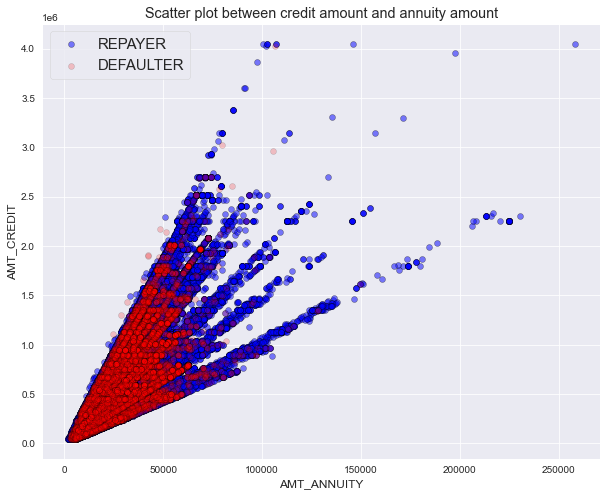

In [49]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[df["TARGET"]==0]['AMT_ANNUITY'],df[df["TARGET"]==0]['AMT_CREDIT'],s=35,color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(df[df["TARGET"]==1]['AMT_ANNUITY'],df[df["TARGET"]==1]['AMT_CREDIT'],s=35,color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

#### Inference

#### Both Defaulters and Repayers are making somewhat very similar pattern but dots of repayers are a bit more scattered.
# 

## 5.7 Distribution of Suite type


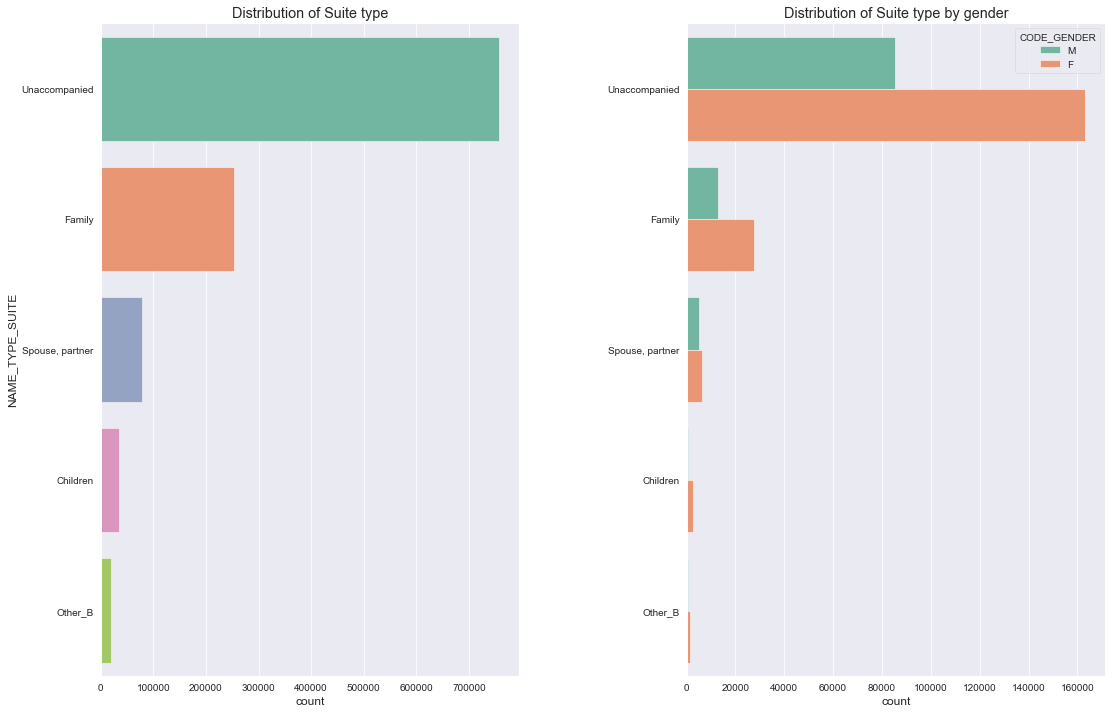

In [50]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_TYPE_SUITE"],palette="Set2",order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["NAME_TYPE_SUITE"],hue=data["CODE_GENDER"],palette="Set2",order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

#### Inference

#### Subplot 1
#### Maximum clients were unaccompanied.

#### Subplot 2
#### Mostly the females client visited unacompanied.
# 

## 5.8 Distribution of client income type



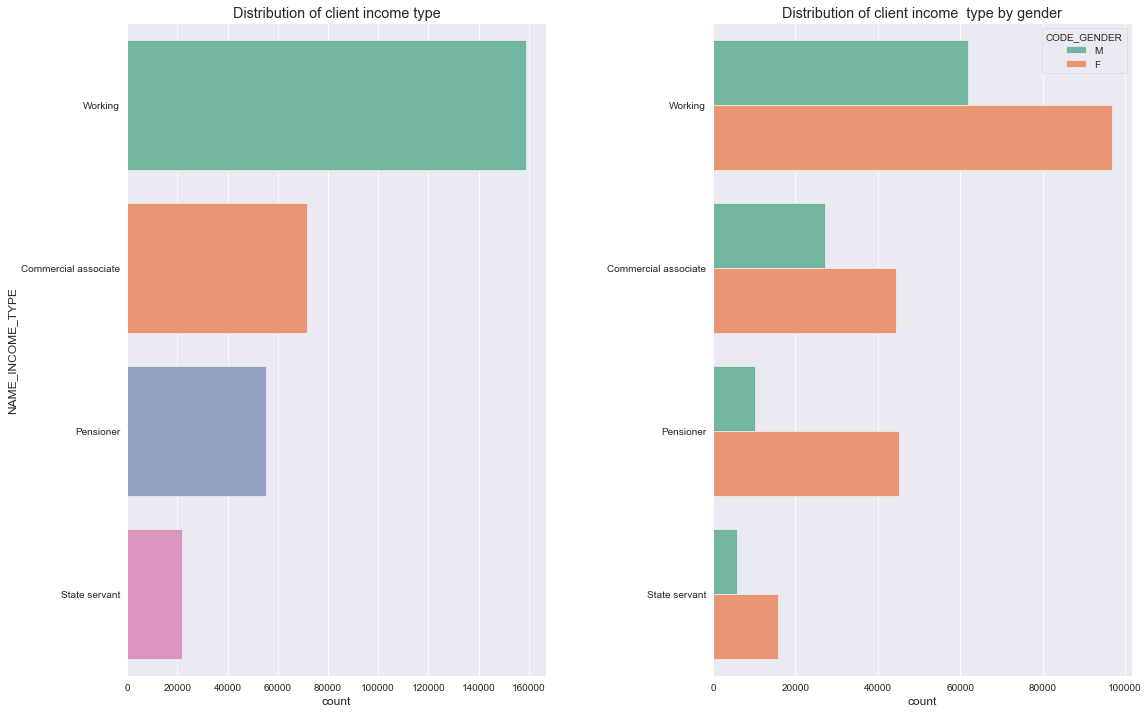

In [51]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],palette="Set2",order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],hue=data["CODE_GENDER"],palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

#### Inference
#### Subplot 1
#### 1. Mostly clients were working class followed by commercial associates.
#### 2. State servants are least in number.

#### Subplot 2
#### 1. Mostly in working class females applied for loans the most.
# 

## 5.9 Distribution of Education type by loan repayment status



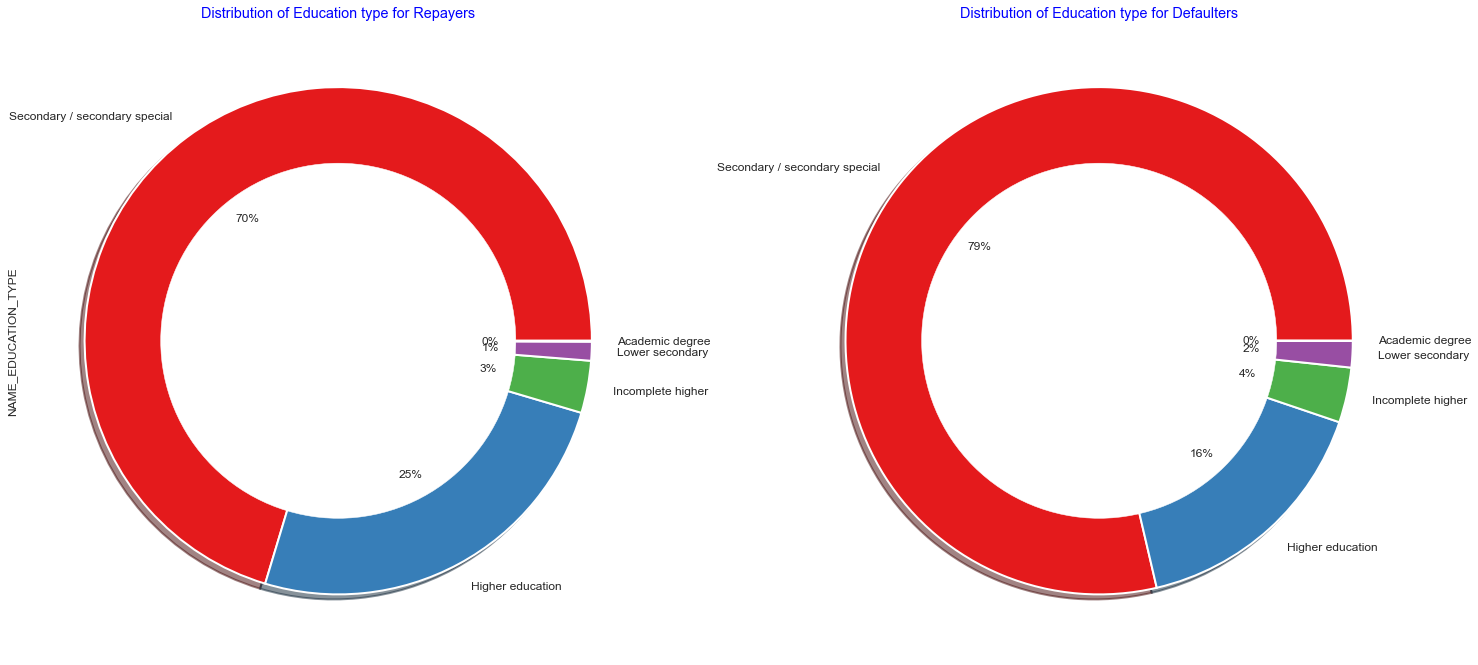

In [52]:
plt.figure(figsize=(25,25))
plt.subplot(121)
df[df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",colors = sns.color_palette("Set1"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
df[df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",colors = sns.color_palette("Set1"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Infernce

#### Clients who default have proportionally 9% less higher education compared to clients who do not default.
# 

## 5.10 Average Earnings by different professions and education types.


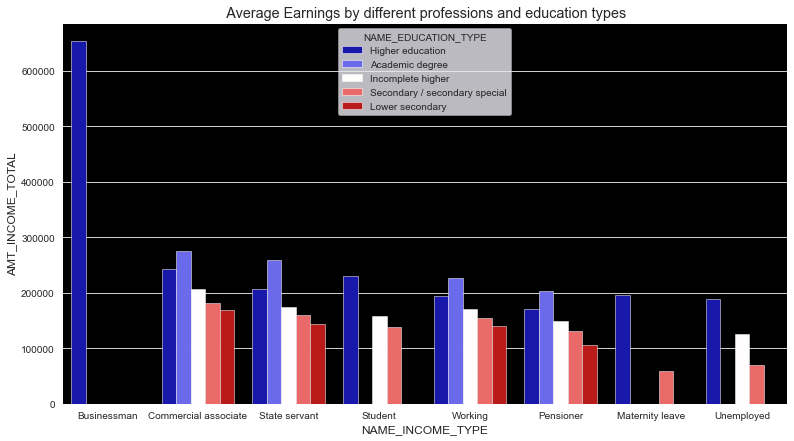

In [53]:
edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

#### Inference

#### Businessman's with Higher education earns the most. Rest other class have a somewhat similar earning and education.
# 

## 5.11 Distribution of Education type by loan repayment status.


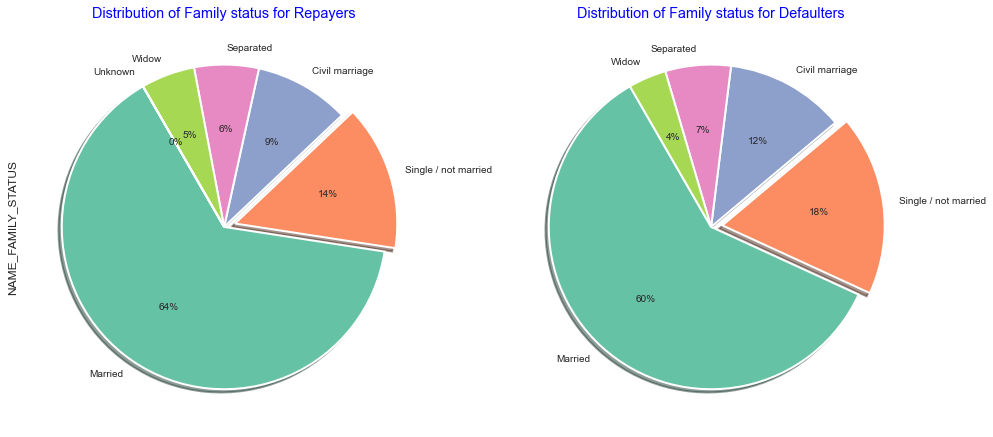

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(121)
df[df["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",startangle=120,colors = sns.color_palette("Set2",7),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
df[df["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",startangle=120,colors = sns.color_palette("Set2",7),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Inference

#### Percentage of single people are more in defaulters than non defaulters.
# 

## 5.12 Distribution of days employed for target variable.



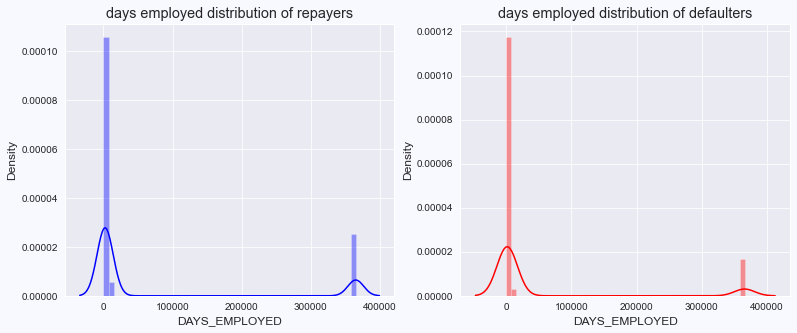

In [55]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(df[df["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(df[df["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

#### Inference
#### No solid inference from this plot.
# 

## 5.13 Distribution of registration days for target variable.


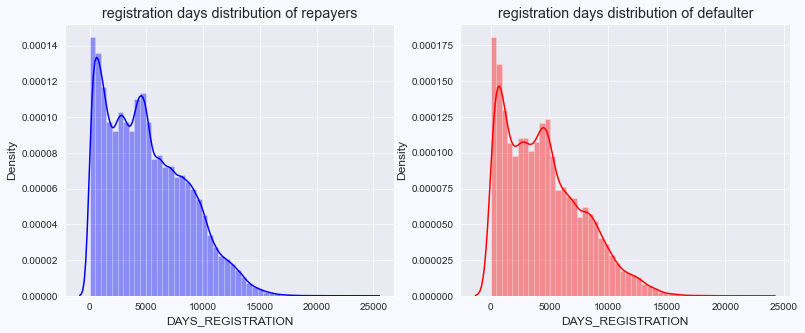

In [56]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(df[df["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(df[df["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

#### Inference
#### Nothing can be inferred because both the plots are similar looking.
# 

## 5.14 Number of days before application client changed phone.


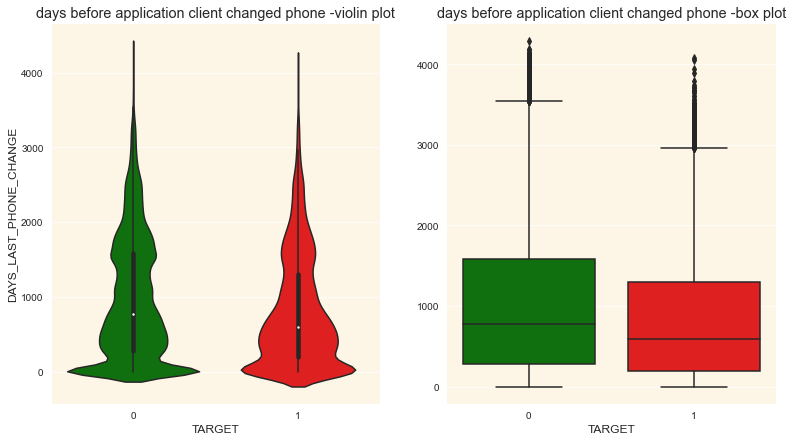

In [57]:
#T_PHONE_CHANGE - How many days before application did client change phone.

plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(df["TARGET"],df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.boxplot(df["TARGET"],df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

#### Inference

#### Average days of defaulters phone change is less than average days of repayers phone change.
# 

## 5.15 Distribution in organization types for repayers and defaulters.

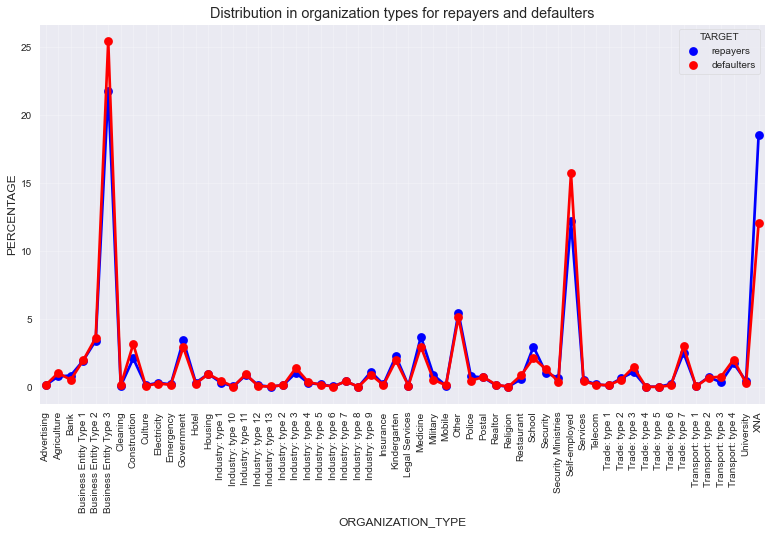

In [58]:
# Dividing data set by target 

org = df.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["PERCENTAGE"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["PERCENTAGE"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","PERCENTAGE",data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)

ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

#### INFERENCE:-
#### 1- Clients from Business Entity 3, Construction and self-employed have more defaulters than repayers.
# 

# 6 Analysing previous application data
## 6.1 Current loan id having previous loan applications.


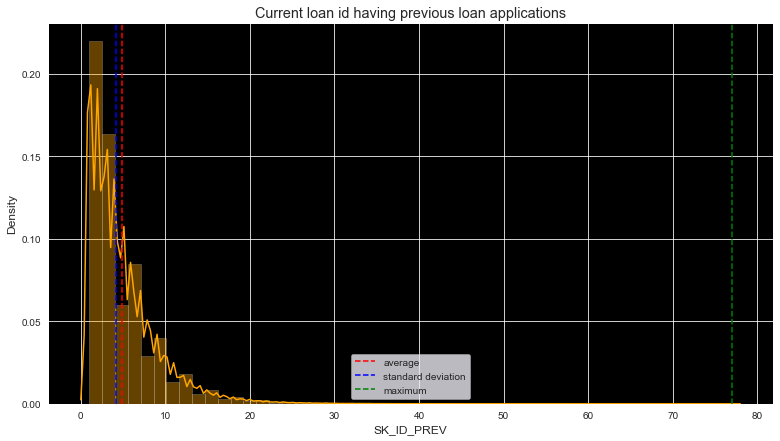

In [59]:
x = old_df.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

#### Inference

#### On average current loan ids have 4 to 5 loan applications previously
# 

## 6.2 Total and average amounts applied and credited in previous applications


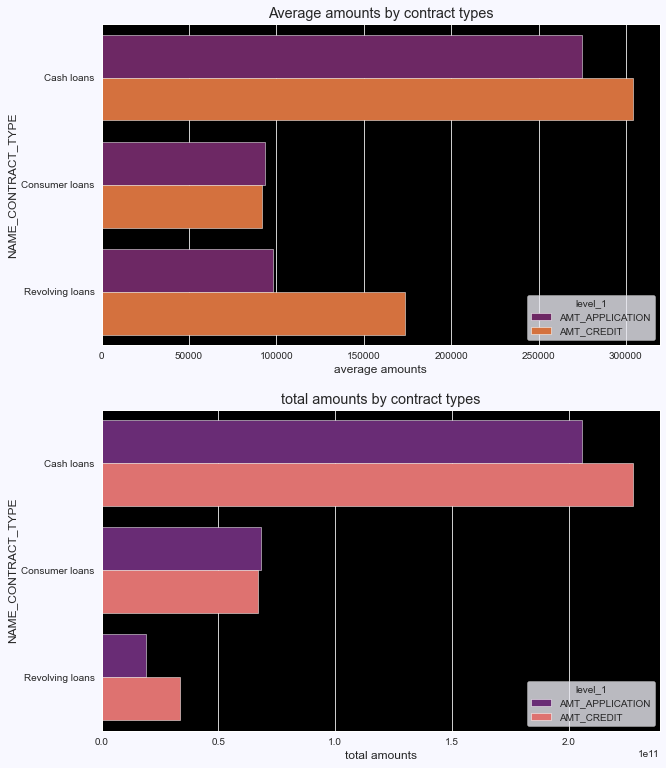

In [60]:
mn = old_df.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = old_df.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

#### Inference

#### On average basis amount applied and credited is highest. Same is the case for total amount basis.

#### On average basis consumer loan is applied the least and if we check on total basis the revoloving loan is least applied for.
# 

## 6.3 Annuity of previous application


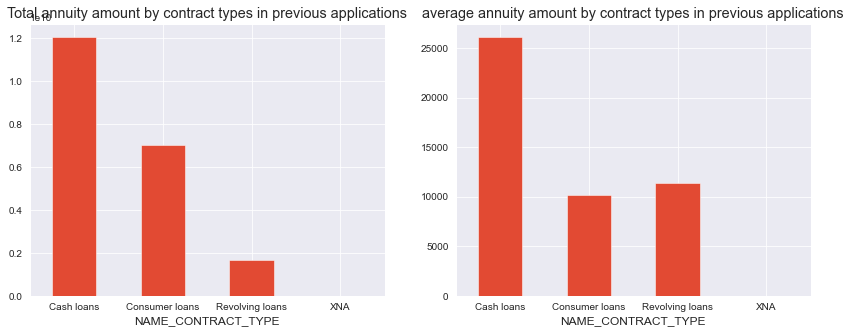

In [61]:
plt.figure(figsize=(14,5))
plt.subplot(121)
old_df.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
old_df.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()


#### Inference
#### Cash loan is provided the most on average basis and overall basis .
# 

## 6.4 Count of application status by application type.

#### NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

#### NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.


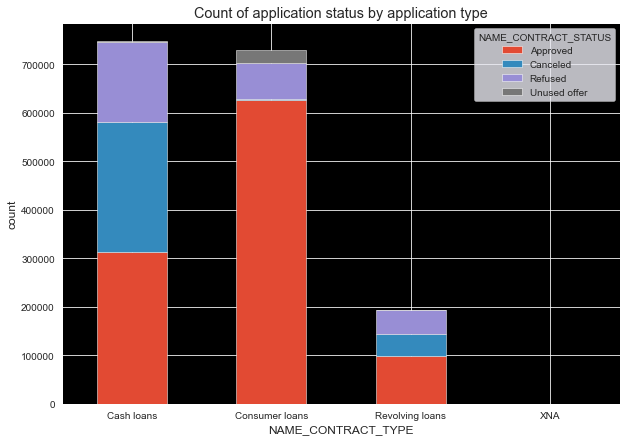

In [62]:
ax = pd.crosstab(old_df["NAME_CONTRACT_TYPE"],old_df["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

#### Inference

#### Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.
# 

## 6.5 Contract status by weekdays



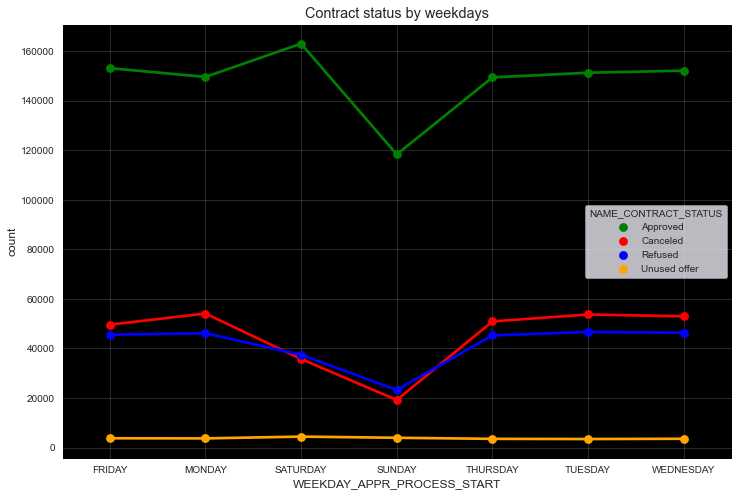

In [63]:
hr = pd.crosstab(old_df["WEEKDAY_APPR_PROCESS_START"],old_df["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)

#### Inference
#### Maximum loans are approved on Saturday
#### Maximum loans are rejected on Monday, Tuesday and Wednesday.
#### Least refusals happens on weekends. Otherwise rest other days refusals are almost the same.
# 


## 6.6 Client payment methods & reasons for application rejections


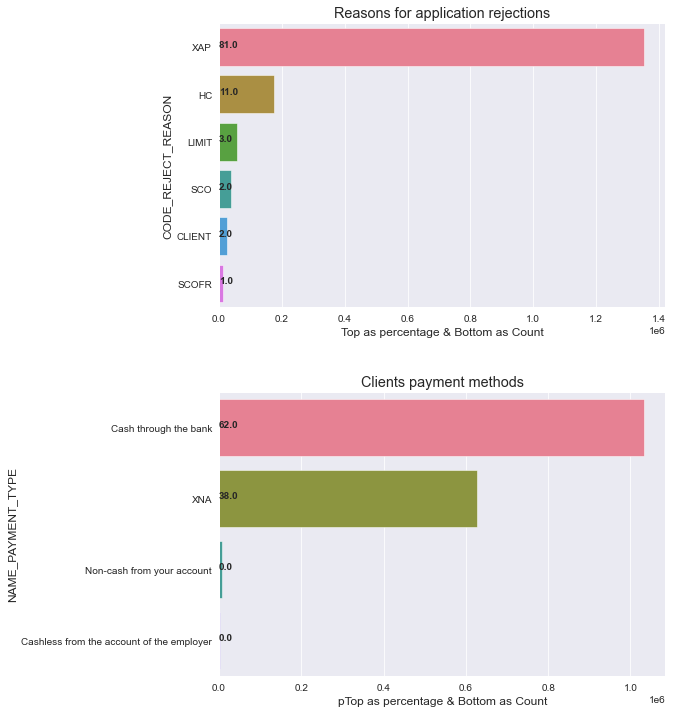

In [64]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = old_df["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = old_df["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)


#### Inference

#### Around 81% of rejected applications the reason is XAP.

#### 62% of chose to pay through cash by bank for previous applications.
# 

## 6.7 Distribution in Client suite type & client type.


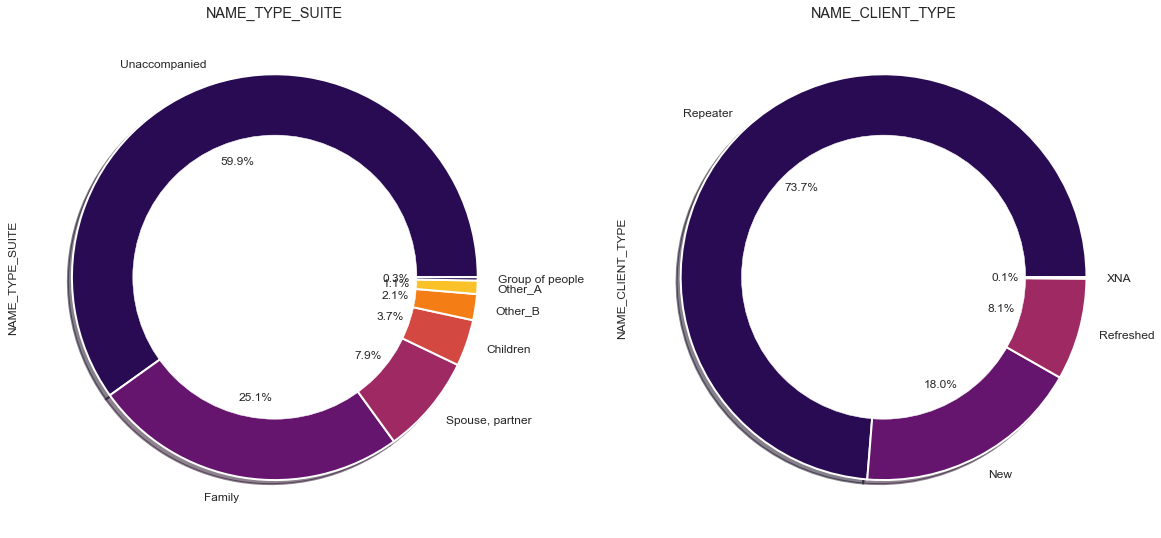

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(121)
old_df["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,colors = sns.color_palette("inferno"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
old_df["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,colors = sns.color_palette("inferno"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()


#### Inference

#### About 60% clients are un-accompained when applying for loans.

#### 73% clients are old clients
# 

## 6.8 Popular goods for applying loans

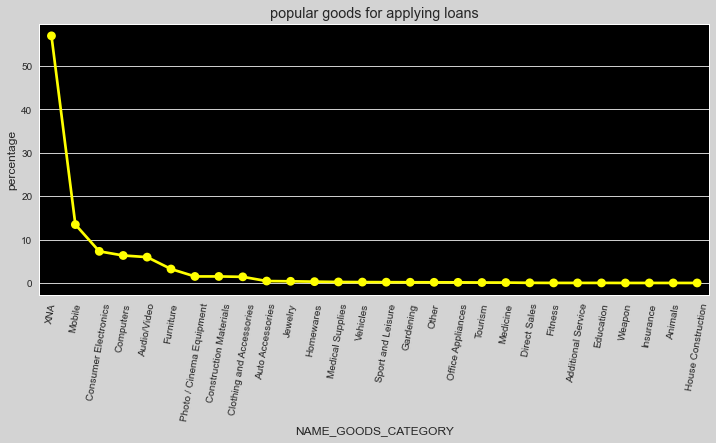

In [66]:
goods = old_df["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

#### Inference
#### XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans.
# 

## 6.9 Previous applications portfolio and product types


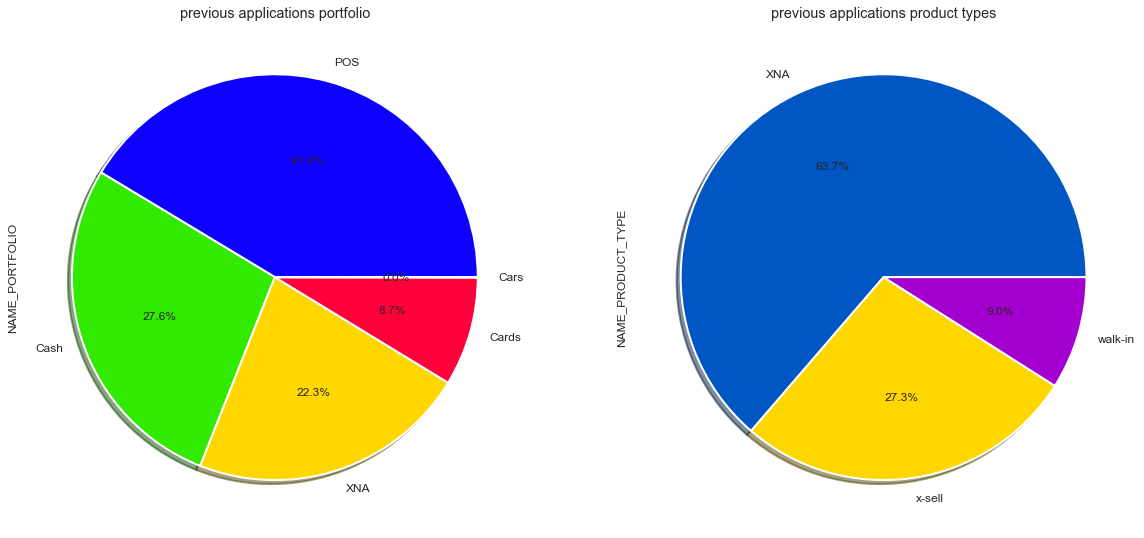

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(121)
old_df["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,colors = sns.color_palette("prism",5),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
old_df["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,colors = sns.color_palette("prism",3),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("previous applications product types")
plt.show()

#### Inference
#### POS and cash are the main protfolios for which loan applied while x-sell and walk-in are the main products.
# 

## 6.10 Approval,canceled and refusal rates by channel types.


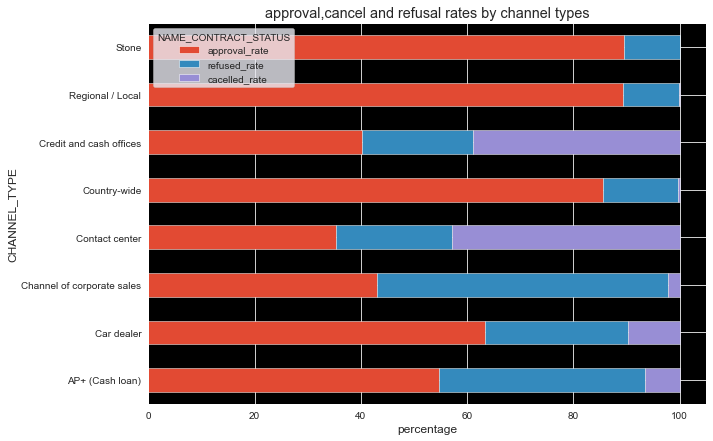

In [68]:
app = pd.crosstab(old_df["CHANNEL_TYPE"],old_df["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

#### Inference

#### Channel types like Stone ,regional and country-wide have maximum approval rates.

#### Channel of coorporate sales have maximum refusal rate.

#### Credit-cash centres and Contact centres have maximum cancellation rates.
# 

## 6.11 Days variables - Relative to application date of current application
#### DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

#### DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

#### DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

#### DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

#### DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

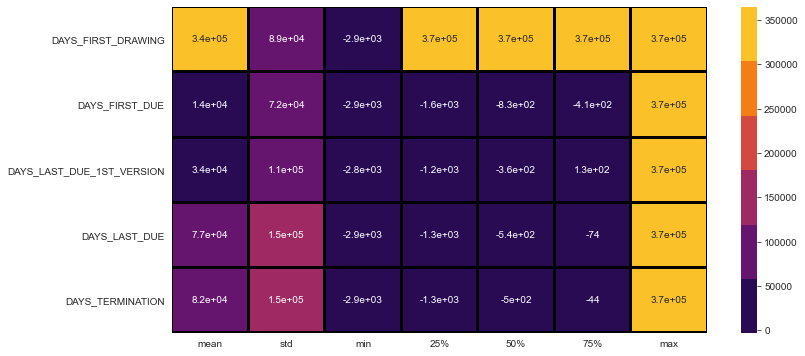

In [69]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(old_df[cols].describe()[1:].transpose(),annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

#### Inference
#### Statistical attributes are highest for Days first drawing variable and these are least for days first due. 
# 

# 7 Corelation between variables


### 7.1 Application Data

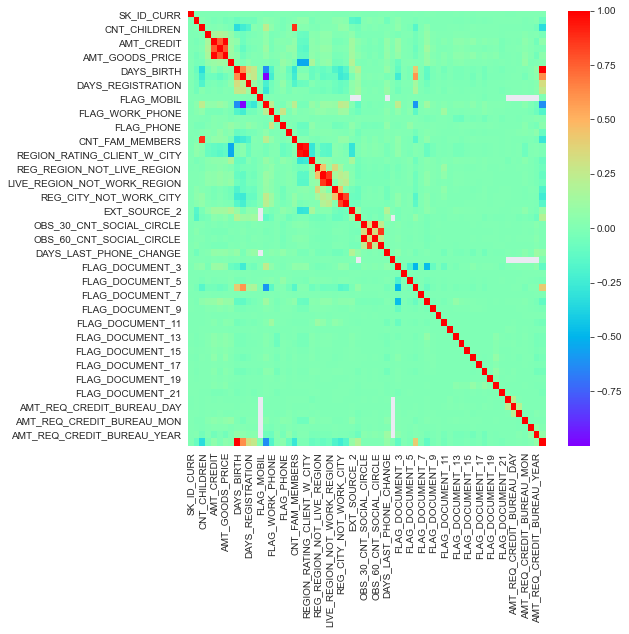

In [70]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

#### Inference
#### Family members and children counts, amt required credit bureau year and birth days are showing highest correlation.
#### Mobile flag and days registration are showing least correlation.
# 


### 7.2 Previous Application

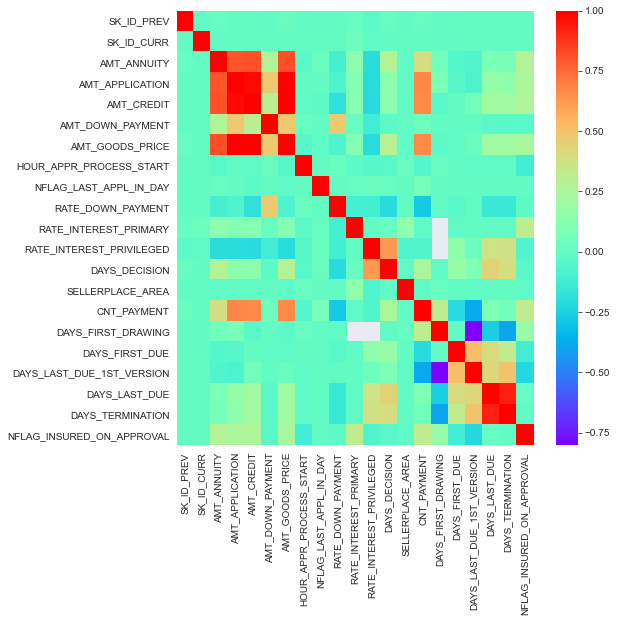

In [71]:
corrmat = old_df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

#### Inference
#### Payment count and all income types are showing highest correlation.

#### Registration days and first drawing, payment count and days last dur 1st version are showing least correlation.
# 

# 8 CONCLUSION
##### 1. Banks should focus more on education type 'Higher education' and avoid Secondary/secondary special, incomplete higher or lower secondary as they face paying difficulties.
##### 2. Avoid income type of 'Working' clients as they have high percentage of paying difficulties. Instead focus on Commercial associate, pensioner and State servant.
##### 3. Focus on clients from housing type ‘House/apartment’ as they are having less paying difficulties.
##### 4. Bank should focus 'Country-wide' channel type sees more no of Approved loans. Whereas, Credit and cash offices channel type sees more number of Canceled and Refused loans.
##### 5. Banks should focus on the client from age group of 41 to 70 as they will be financial stable and shows less paying difficulties.